<center><h1>Практическая работа №2</h1></center>
<center><h1>Предварительная обработка данных. Часть2</h1></center>

1. Для выпонения работы необходимо следовать инструкциям ниже. 
2. Старайтесь не просто запустить код, а понять смысл написанного
3. После каждого объяснения следует следует пустое поле с тегом (TO DO).
4. Поля с тегом (TO DO) необходимо заполнить своим примером
5. Выполняйте работу индивилуально и старайтесь меньше обращаться к агентам-помощникам

### При работе с реальными данными может возникать множество проблем

Процесс создания ИИ модели и ее качество напрмую зависит от качества данных, используемых для ее обучения. В рамках данной работы вы научитесь понимать:
1. Что означает качественные данные
2. Определять качественные данные или нет 
3. Научетесь нескольким техникам для повышения качества данных

поработаем с реальным набором данных с kaggle  по нефтяным скважинам 
https://www.kaggle.com/datasets/ruslanzalevskikh/oil-well (описание можно найти перейдя по ссылке)


Для работы с kaggle надо установить kagglehub
1. pip install kagglehub

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ruslanzalevskikh/oil-well")

print("Path to dataset files:", path)

c:\Users\Master\Desktop\nkot0603\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 121k/121k [00:00<00:00, 659kB/s]

Extracting files...
Path to dataset files: C:\Users\Master\.cache\kagglehub\datasets\ruslanzalevskikh\oil-well\versions\1


Перед тем, как работать с csv нужно выпонить ряд манипуляций по перводу xslx в csv
1. Сохраните файл xslx как csv
2. Откройте его в текстовом редакторе
3. Убедитесь в правилности создания файла. Удалите ненужные строки. В противном случае данные будут загружаться с ошибкой
4. Посмотрите какой используется разделитель

In [2]:
import pandas as pd
df_OilWell=pd.read_csv("Oil well.csv",delimiter=";")

Хорошей практикой ялвяется работа не с самим датасетом, а с его копией.
 В  таком случае при необходимости мы сможем быстро вернуться к первоначальному набору данных даже если сделалли ряд преобразований.

In [3]:
#скопируем dataframe
df_OilWellCopy=df_OilWell.copy()

Введем первые 5 строк датафрейма чтобы убедиться в правильной загрузке данных

In [4]:
df_OilWellCopy.head()

,Date,Oil volume (m3/day),Volume of liquid (m3/day),Gas volume (m3/day),Water volume (m3/day),Water cut (%),Working hours,Dynamic level (m),Reservoir pressure (atm)
0,01.01.2013,49,70,13055,21,29,24,1819,214
1,02.01.2013,49,70,13055,21,29,24,1836,214
2,03.01.2013,49,70,13055,21,29,24,1788,214
3,04.01.2013,49,70,13055,21,29,24,1789,214
4,05.01.2013,44,70,11768,26,36,24,1825,214


In [5]:
df_OilWellCopy.columns = ['Date', 'OilVol', 'LiqVol', 'GasVol.',
              'WaterVol.', 'WaterCut', 'WorkingHours', 'Level', 'Pressure']
df_OilWellCopy.head()

,Date,OilVol,LiqVol,GasVol.,WaterVol.,WaterCut,WorkingHours,Level,Pressure
0,01.01.2013,49,70,13055,21,29,24,1819,214
1,02.01.2013,49,70,13055,21,29,24,1836,214
2,03.01.2013,49,70,13055,21,29,24,1788,214
3,04.01.2013,49,70,13055,21,29,24,1789,214
4,05.01.2013,44,70,11768,26,36,24,1825,214


Выведем размер датасета

In [6]:
print (df_OilWellCopy.shape)

(2939, 9)


выведем информацию о данных 

In [7]:
print (df_OilWellCopy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2939 entries, 0 to 2938
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          2939 non-null   object
 1   OilVol        2939 non-null   int64 
 2   LiqVol        2939 non-null   int64 
 3   GasVol.       2939 non-null   int64 
 4   WaterVol.     2939 non-null   int64 
 5   WaterCut      2939 non-null   int64 
 6   WorkingHours  2939 non-null   int64 
 7   Level         2939 non-null   int64 
 8   Pressure      2939 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 206.8+ KB
None


Проверим на пропущенные значения 

In [8]:
print (df_OilWellCopy.isnull().sum())

Date            0
OilVol          0
LiqVol          0
GasVol.         0
WaterVol.       0
WaterCut        0
WorkingHours    0
Level           0
Pressure        0
dtype: int64


Как видим пропущенных значений нет

Выведем статистику

In [9]:
print (df_OilWellCopy.describe())

            OilVol       LiqVol       GasVol.    WaterVol.     WaterCut  \
count  2939.000000  2939.000000   2939.000000  2939.000000  2939.000000   
mean     17.624362    59.464103   4730.146308    41.828853    70.694794   
std       9.689026    18.634101   2598.888524    13.056625     9.534203   
min       0.000000    12.000000      4.000000     9.000000    29.000000   
25%      11.000000    50.000000   3041.500000    33.000000    69.000000   
50%      15.000000    58.000000   3909.000000    43.000000    73.000000   
75%      22.000000    74.000000   5843.500000    50.000000    76.000000   
max      49.000000   113.000000  13113.000000    99.000000   100.000000   

       WorkingHours        Level     Pressure  
count   2939.000000  2939.000000  2939.000000  
mean      22.344675  1930.383464   157.019054  
std        3.039553   114.543752    32.917150  
min        7.000000  1529.000000   100.000000  
25%       22.000000  1855.000000   129.000000  
50%       24.000000  1890.000000   1

Полученная информация показывает, что данные содержат 9 столбоцов. в каждом 2939 значений. И т.д. и т.п.

Можно удалить дубликаты, пустые значения и преобразовать колонку с типом Дата

In [11]:
WithDup=df_OilWellCopy.drop_duplicates()
print (WithDup.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2939 entries, 0 to 2938
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          2939 non-null   object
 1   OilVol        2939 non-null   int64 
 2   LiqVol        2939 non-null   int64 
 3   GasVol.       2939 non-null   int64 
 4   WaterVol.     2939 non-null   int64 
 5   WaterCut      2939 non-null   int64 
 6   WorkingHours  2939 non-null   int64 
 7   Level         2939 non-null   int64 
 8   Pressure      2939 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 206.8+ KB
None


Получим таблицу корреляции для датафрейма

In [21]:
WithDup.corr()

ValueError: could not convert string to float: '01.01.2013'

Получили ошибку, так как один из столбцов является Датой и типом string и не может участовать в корреляционном анализе. 
Удалим его

In [22]:
dfWithoutData = WithDup.drop('Date', axis=1)
print(dfWithoutData.head())

   OilVol  LiqVol  GasVol.  WaterVol.  WaterCut  WorkingHours  Level  Pressure
0      49      70    13055         21        29            24   1819       214
1      49      70    13055         21        29            24   1836       214
2      49      70    13055         21        29            24   1788       214
3      49      70    13055         21        29            24   1789       214
4      44      70    11768         26        36            24   1825       214


In [23]:
dfWithoutData.corr()

,OilVol,LiqVol,GasVol.,WaterVol.,WaterCut,WorkingHours,Level,Pressure
OilVol,1.000000,0.748352,0.999549,0.325869,-0.865860,0.466357,-0.481150,0.843783
LiqVol,0.748352,1.000000,0.748087,0.870636,-0.329937,0.686451,-0.673897,0.892403
GasVol.,0.999549,0.748087,1.000000,0.325413,-0.866671,0.466933,-0.480619,0.843722
WaterVol.,0.325869,0.870636,0.325413,1.000000,0.171751,0.631839,-0.604462,0.646833
WaterCut,-0.865860,-0.329937,-0.866671,0.171751,1.000000,-0.183138,0.202551,-0.546595
WorkingHours,0.466357,0.686451,0.466933,0.631839,-0.183138,1.000000,-0.612495,0.528617
Level,-0.481150,-0.673897,-0.480619,-0.604462,0.202551,-0.612495,1.000000,-0.695440
Pressure,0.843783,0.892403,0.843722,0.646833,-0.546595,0.528617,-0.695440,1.000000


Так как таблица не очень показательная, сделаем тепловую карту 

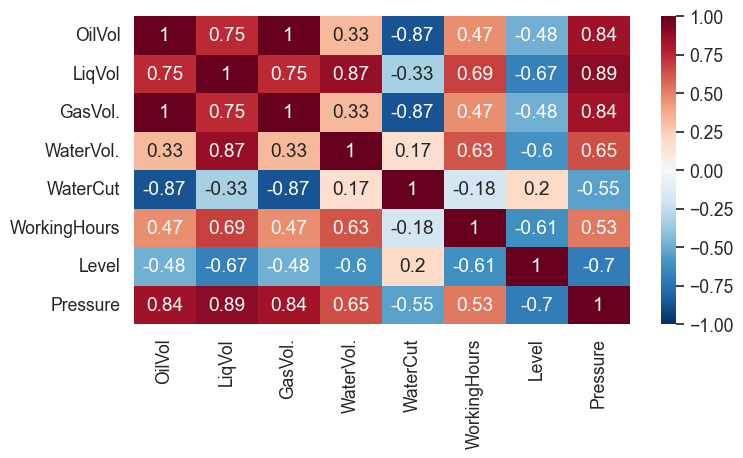

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    dfWithoutData.corr(),        
    cmap='RdBu_r', # задаёт цветовую схему
    annot=True, # рисует значения внутри ячеек
    vmin=-1, vmax=1); # указывает начало цветовых кодов от -1 до 1.


Pairplot для сравнения распределения пар числовых переменных создаёт сетку точечных диаграмм.   
Он также содержит гистограмму для каждой функции в диагональных прямоугольниках.

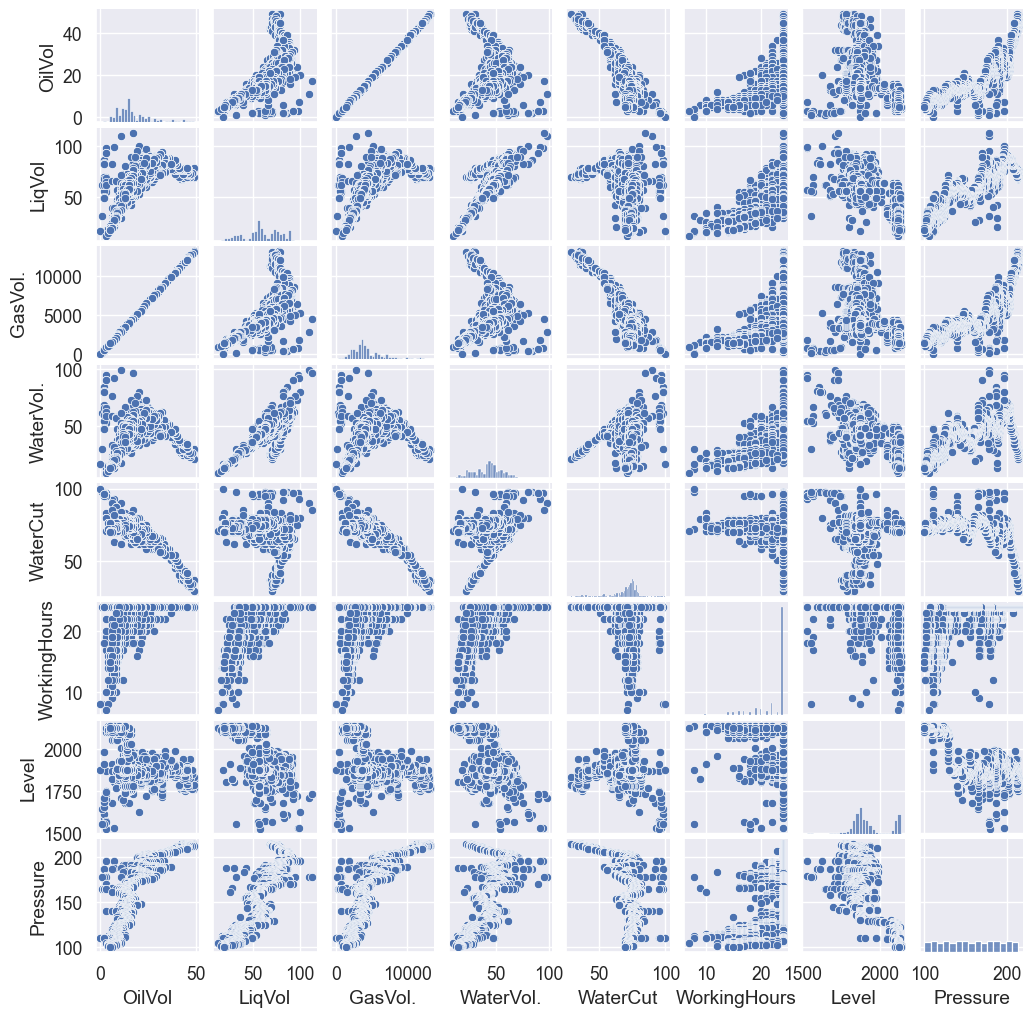

In [27]:
b=sns.pairplot(dfWithoutData)
b.figure.set_size_inches(10,10)


Сделем  тот же самый  график относительно величины Давления.

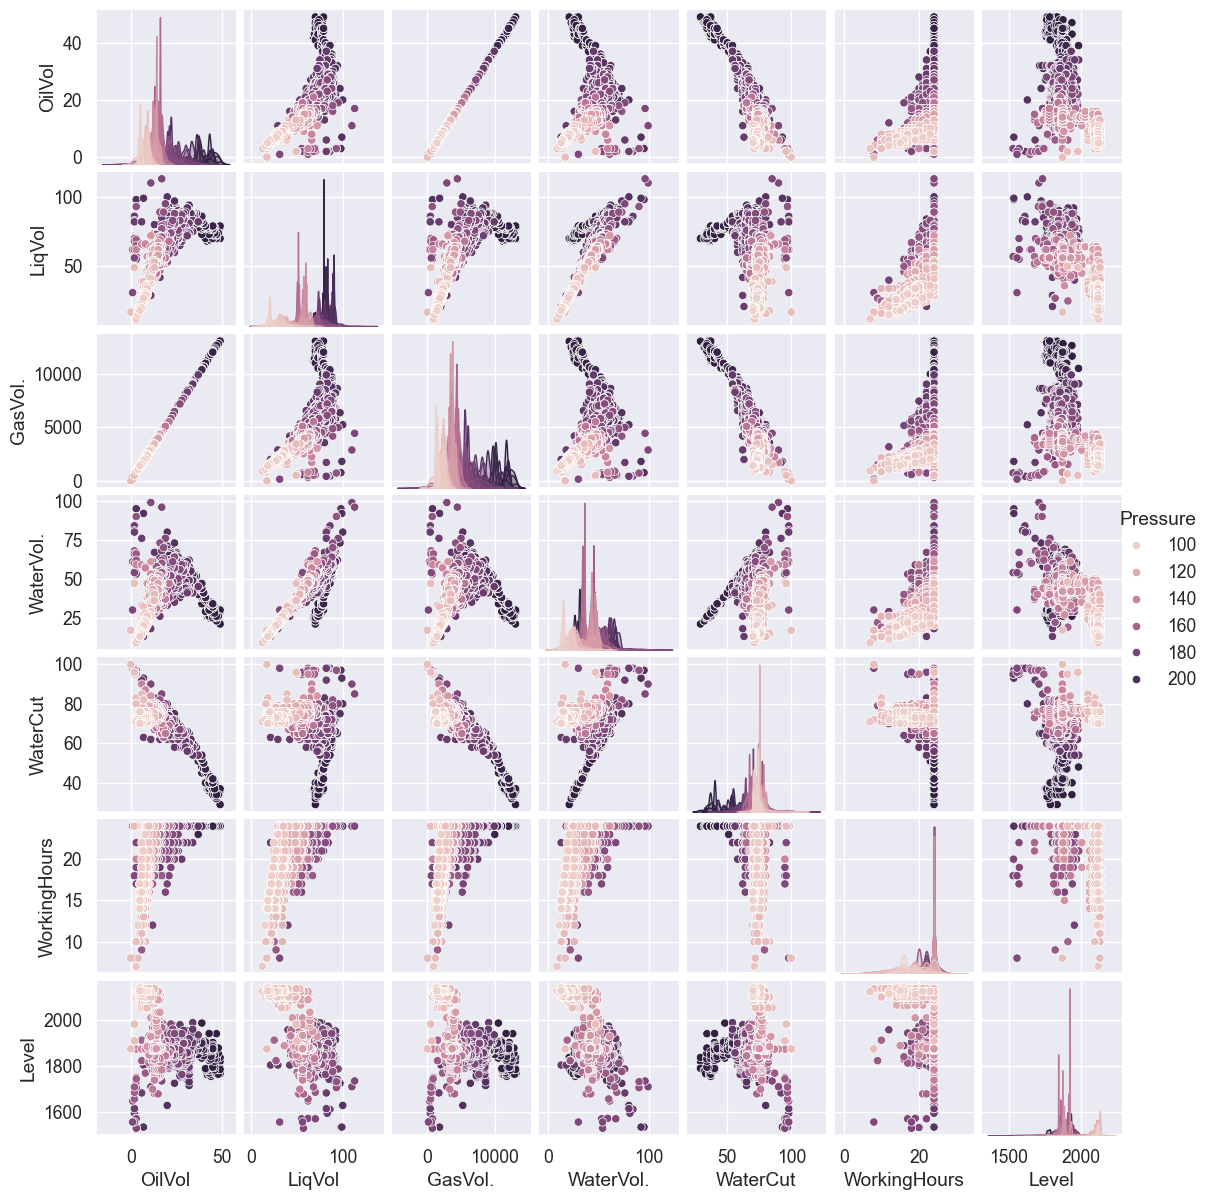

In [29]:
b=sns.pairplot(
    data=dfWithoutData, 
    aspect=.85,
    hue='Pressure'); # hue='Pressure' подсвечивает указанную категорию другим цветом.

b.figure.set_size_inches(12,12)

### <font color="red">...(TO DO)...</font>
<font color="red">1.Выберете свой датасет на Kaggle. \
2. Обработайте его, используя указанные способы и применив не менее 10 своих способов обработки. \
3. Проанализируйте данные подходящим для данного набора способом</font> 